In [1]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv("private_companies_highest_valuation.csv")

# Check and change datatypes if necessary
df.info()  # View current data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Symbol                    103 non-null    object
 1   Company                   103 non-null    object
 2   Price                     103 non-null    object
 3   52 Wk Change %            103 non-null    object
 4   Estimated Valuation       103 non-null    object
 5   Total Funding Raised      103 non-null    object
 6   Latest Funding Date       103 non-null    object
 7   Latest Amount Raised      103 non-null    object
 8   Latest Round Share Class  95 non-null     object
 9   Private Company Sector    103 non-null    object
dtypes: object(10)
memory usage: 8.3+ KB


In [3]:
# Display first few rows  
df.head()

,Symbol,Company,Price,52 Wk Change %,Estimated Valuation,Total Funding Raised,Latest Funding Date,Latest Amount Raised,Latest Round Share Class,Private Company Sector
0,SPAX.PVT,SpaceX,214.28 0.00 (0.00%),+96.16%,405.395B,8.173B,2020-08-03,1.901B,Series N,Space
1,OPAI.PVT,OpenAI,297.76 0.00 (0.00%),+115.88%,172.701B,6.9B,--,--,NaN,Artificial Intelligence
2,STRI.PVT,Stripe,35.95 0.00 (0.00%),+37.37%,91.5B,8.445B,--,--,NaN,Financial Services
3,DATB.PVT,Databricks,107.91 0.00 (0.00%),+54.16%,72.379B,14.426B,2024-12-16,10.175B,Series J,Data and Analytics
4,ANTH.PVT,Anthropic,60.11 0.00 (0.00%),+100.37%,65.912B,15.69B,2025-03-02,1.278B,Series E-1,Artificial Intelligence


In [5]:
# Drop rows where 'Latest Funding Date', 'Latest Amount Raised', or 'Latest Round Share Class' are missing
df.dropna(subset=['Latest Funding Date', 'Latest Amount Raised', 'Latest Round Share Class'], inplace=True)

In [9]:
# Confirm rows were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Symbol                    95 non-null     object
 1   Company                   95 non-null     object
 2   Price                     95 non-null     object
 3   52 Wk Change %            95 non-null     object
 4   Estimated Valuation       95 non-null     object
 5   Total Funding Raised      95 non-null     object
 6   Latest Funding Date       95 non-null     object
 7   Latest Amount Raised      95 non-null     object
 8   Latest Round Share Class  95 non-null     object
 9   Private Company Sector    95 non-null     object
dtypes: object(10)
memory usage: 8.2+ KB


In [11]:
# Clean 'Price' column (removing everything after the first space to remove the 0.000 values)
df['Price'] = df['Price'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

In [13]:
# Display first few rows to confirm that the price column has been cleaned
df.head()

,Symbol,Company,Price,52 Wk Change %,Estimated Valuation,Total Funding Raised,Latest Funding Date,Latest Amount Raised,Latest Round Share Class,Private Company Sector
0,SPAX.PVT,SpaceX,214.28,+96.16%,405.395B,8.173B,2020-08-03,1.901B,Series N,Space
3,DATB.PVT,Databricks,107.91,+54.16%,72.379B,14.426B,2024-12-16,10.175B,Series J,Data and Analytics
4,ANTH.PVT,Anthropic,60.11,+100.37%,65.912B,15.69B,2025-03-02,1.278B,Series E-1,Artificial Intelligence
5,XAAI.PVT,xAI,21.65,"+2,065.00%",50B,12.135B,2024-12-22,6B,Series C,Artificial Intelligence
6,FIGR.PVT,Figure AI,194.00,"+1,367.47%",38.154B,745.31M,2024-02-22,675M,Series B,Hardware


In [17]:
# Remove '%' sign
df['52 Wk Change %'] = df['52 Wk Change %'].str.replace('%', '', regex=True)

In [19]:
# Display first few rows to confirm that the price column has been cleaned
df.head()

,Symbol,Company,Price,52 Wk Change %,Estimated Valuation,Total Funding Raised,Latest Funding Date,Latest Amount Raised,Latest Round Share Class,Private Company Sector
0,SPAX.PVT,SpaceX,214.28,+96.16,405.395B,8.173B,2020-08-03,1.901B,Series N,Space
3,DATB.PVT,Databricks,107.91,+54.16,72.379B,14.426B,2024-12-16,10.175B,Series J,Data and Analytics
4,ANTH.PVT,Anthropic,60.11,+100.37,65.912B,15.69B,2025-03-02,1.278B,Series E-1,Artificial Intelligence
5,XAAI.PVT,xAI,21.65,"+2,065.00",50B,12.135B,2024-12-22,6B,Series C,Artificial Intelligence
6,FIGR.PVT,Figure AI,194.00,"+1,367.47",38.154B,745.31M,2024-02-22,675M,Series B,Hardware


In [21]:
# Function to convert 'B' (billion) and 'M' (million) values to full numeric format
def convert_to_numeric(value):
    if isinstance(value, str):
        match = re.match(r'([\d,.]+)([BM])', value)
        if match:
            num, unit = match.groups()
            num = float(num.replace(',', ''))  # Remove commas and convert to float
            if unit == 'B':
                return int(num * 1_000_000_000)  # Convert to full billion
            elif unit == 'M':
                return int(num * 1_000_000)  # Convert to full million
    return value

# Apply conversion to relevant columns
for col in ['Estimated Valuation', 'Total Funding Raised', 'Latest Amount Raised']:
    df[col] = df[col].apply(convert_to_numeric)

In [23]:
# Display first few rows to confirm that the B & M has been replaced with their full values in billions & milllions respectively
df.head()

,Symbol,Company,Price,52 Wk Change %,Estimated Valuation,Total Funding Raised,Latest Funding Date,Latest Amount Raised,Latest Round Share Class,Private Company Sector
0,SPAX.PVT,SpaceX,214.28,+96.16,405395000000,8173000000,2020-08-03,1901000000,Series N,Space
3,DATB.PVT,Databricks,107.91,+54.16,72379000000,14426000000,2024-12-16,10175000000,Series J,Data and Analytics
4,ANTH.PVT,Anthropic,60.11,+100.37,65912000000,15690000000,2025-03-02,1278000000,Series E-1,Artificial Intelligence
5,XAAI.PVT,xAI,21.65,"+2,065.00",50000000000,12135000000,2024-12-22,6000000000,Series C,Artificial Intelligence
6,FIGR.PVT,Figure AI,194.00,"+1,367.47",38154000000,745310000,2024-02-22,675000000,Series B,Hardware


In [25]:
# Convert columns to appropriate data types
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Estimated Valuation'] = pd.to_numeric(df['Estimated Valuation'], errors='coerce')
df['Total Funding Raised'] = pd.to_numeric(df['Total Funding Raised'], errors='coerce')
df['Latest Amount Raised'] = pd.to_numeric(df['Latest Amount Raised'], errors='coerce')

# Convert 'Latest Funding Date' to datetime format
df['Latest Funding Date'] = pd.to_datetime(df['Latest Funding Date'], errors='coerce')

In [27]:
# Display first few rows to confirm that the column data types have been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Symbol                    95 non-null     object        
 1   Company                   95 non-null     object        
 2   Price                     94 non-null     float64       
 3   52 Wk Change %            95 non-null     object        
 4   Estimated Valuation       95 non-null     int64         
 5   Total Funding Raised      95 non-null     int64         
 6   Latest Funding Date       95 non-null     datetime64[ns]
 7   Latest Amount Raised      94 non-null     float64       
 8   Latest Round Share Class  95 non-null     object        
 9   Private Company Sector    95 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 8.2+ KB


In [29]:
# Confirm everything is correct before saving
df.head()

,Symbol,Company,Price,52 Wk Change %,Estimated Valuation,Total Funding Raised,Latest Funding Date,Latest Amount Raised,Latest Round Share Class,Private Company Sector
0,SPAX.PVT,SpaceX,214.28,+96.16,405395000000,8173000000,2020-08-03,1.901000e+09,Series N,Space
3,DATB.PVT,Databricks,107.91,+54.16,72379000000,14426000000,2024-12-16,1.017500e+10,Series J,Data and Analytics
4,ANTH.PVT,Anthropic,60.11,+100.37,65912000000,15690000000,2025-03-02,1.278000e+09,Series E-1,Artificial Intelligence
5,XAAI.PVT,xAI,21.65,"+2,065.00",50000000000,12135000000,2024-12-22,6.000000e+09,Series C,Artificial Intelligence
6,FIGR.PVT,Figure AI,194.00,"+1,367.47",38154000000,745310000,2024-02-22,6.750000e+08,Series B,Hardware


In [5]:
import pandas as pd
df = pd.read_csv("cleaned_private_companies.csv")

# Deriving Insights

# 1. Top values private companies: Which companies have the highest valuations?
top_valued = df[['Company', 'Estimated Valuation']].sort_values(by='Estimated Valuation', ascending=False).head(10)
print(top_valued)

              Company  Estimated Valuation
0              SpaceX         405395000000
1          Databricks          72379000000
2           Anthropic          65912000000
3                 xAI          50000000000
4           Figure AI          38154000000
5  Anduril Industries          27386000000
6           CoreWeave          24389000000
7               Figma          17838000000
8            Fanatics          17093000000
9            Scale AI          15758000000


In [7]:
# 2. Industry Trends: Which sectors dominate the highest valuations?

sector_valuations = df.groupby('Private Company Sector')['Estimated Valuation'].sum().sort_values(ascending=False)
print(sector_valuations)

Private Company Sector
Space                               411366999999
Artificial Intelligence             141237000000
Data and Analytics                  115246370000
Hardware                             54722792000
Software                             42957793000
Financial Services                   42010714000
Government and Military              32991471000
Blockchain and Crypto                24547000000
Privacy and Security                 22975138000
Commerce and Shopping                17093000000
Administrative Services              16333291000
Biotechnology                         9318000000
Consumer Goods                        6933000000
Messaging and Telecommunications      6617000000
Energy                                6015880000
Supply Chain and Logistics            5345500000
Transportation                        4038449000
Sales and Marketing                   3624975000
Health Care                           2593567000
Food and Beverage                     18223790

In [9]:
# 3. Correlation Between Funding & Valuation: Does more funding lead to a higher valuation?

correlation = df[['Total Funding Raised', 'Estimated Valuation']].corr()
print(correlation)

                      Total Funding Raised  Estimated Valuation
Total Funding Raised              1.000000             0.420746
Estimated Valuation               0.420746             1.000000


In [11]:
# 4. Biggest Funding Rounds & Investment Trends: Which companies have raised the largest funding rounds?

top_funding_rounds = df[['Company', 'Latest Amount Raised']].sort_values(by='Latest Amount Raised', ascending=False).head(10)
print(top_funding_rounds)

             Company Latest Amount Raised
64  TAE Technologies           92661000.0
90            H2O.ai           91031000.0
9           Scale AI          900000000.0
93       Eight Sleep           87579000.0
91         SnapLogic           82500000.0
28       Arctic Wolf           75000000.0
35          Airtable          735000000.0
63      Liquid Death           67610000.0
4          Figure AI          675000000.0
85              Nuro          625000000.0


In [13]:
# 5. Growth & Market Sentiment Analysis: How did companies perform over the last year?

df['52 Wk Change %'].describe()

count       95
unique      94
top       0.00
freq         2
Name: 52 Wk Change %, dtype: object

In [19]:
# Identify companies with the highest change over the past 52 weeks.

top_performers = df[['Company', '52 Wk Change %']].sort_values(by='52 Wk Change %', ascending=False).head(10)
print(top_performers)

               Company 52 Wk Change %
5   Anduril Industries          97.31
0               SpaceX          96.16
11                Ramp          96.00
52    Cityblock Health          95.96
44   SambaNova Systems          95.44
38             Addepar          95.32
32              Vercel          94.64
21           SandboxAQ          82.50
36              Lambda          80.23
6            CoreWeave         796.62


In [23]:
# Identify companies with the lowest change over the past 52 weeks.

bottom_performers = df[['Company', '52 Wk Change %']].sort_values(by='52 Wk Change %', ascending=True).head(10)
print(bottom_performers)

           Company 52 Wk Change %
74      Greenlight          -0.38
33         Zipline          -0.83
63    Liquid Death          -1.54
73  Gecko Robotics          -1.58
57          Motive          -1.75
91       SnapLogic         -10.26
49     Axiom Space         -11.19
46           Rappi         -11.67
35        Airtable         -11.98
90          H2O.ai         -12.01


In [31]:
# 6. Time-Based Analysis of Investments: When were the most recent funding rounds?

df['Latest Funding Date'] = pd.to_datetime(df['Latest Funding Date'], errors='coerce')
funding_trends = df.groupby(df['Latest Funding Date'].dt.year)['Latest Amount Raised'].sum()
print(funding_trends)

Latest Funding Date
2017                                          159678000.0
2018                                          125000000.0
2019                               200000000.0174000000.0
2020                    1901000000.052500000.0150000000.0
2021    200000000.0322557000.01105000000.0449994000.04...
2022    400999000.0300000000.0100000000.0150000000.018...
2023    281549000.01000000000.01048999999.0177130000.0...
2024    10175000000.06000000000.0675000000.01116000000...
2025         1278000000.0240000000.0407573000.050470000.0
Name: Latest Amount Raised, dtype: object


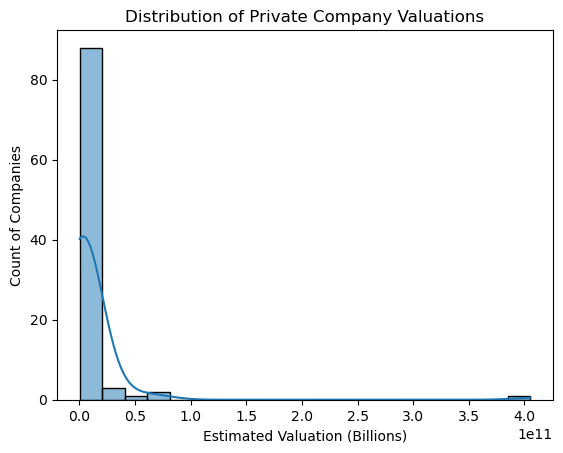

In [33]:
# 7. Distribution of Private Company Valuations

# What is the distribution of private company valuations?
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Estimated Valuation'], bins=20, kde=True)
plt.title("Distribution of Private Company Valuations")
plt.xlabel("Estimated Valuation (Billions)")
plt.ylabel("Count of Companies")
plt.show()